# Pymaceuticals Inc.
---

### Analysis

- The correlation between mouse weight and average tumor volume is 0.84. Since the value is greater than 0.7 but less than 0.9, this indicates a strong correlation. The direction of the line also indicates a positive correlation. There is a strong connection of larger mouse having larger tumor volumes.

- Based of the summary statistics, the Capomulin and Ramicane treatments shows smaller average tumor volume at around 40 (mm3) with Ketapril at largest at 55 (mm3).
 
- Capomulin and Ramicane had slightly larger sample size compared to the others equating to the same amount. The population distribution is 50.6% male to 49.4% female. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame 
# Module 4 - Day 3 - Activity 1
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice. 
# https://stackoverflow.com/questions/65363152/python-pandas-nunique-datatype

mice_total = combined_df["Mouse ID"].nunique()
mice_total

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint 
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

dup_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Module 4 - Day 3 - Activity 6

dup_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dup_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
# https://www.w3resource.com/pandas/dataframe/dataframe-isin.php
# https://www.w3schools.com/python/pandas/ref_df_isin.asp

clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_df)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
# Module 4 - Day 1 - Activity 11

mice_total_clean = len(clean_df["Mouse ID"].unique())
mice_total_clean

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Module 4 - Day 3 - Activity 6

mean = combined_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = combined_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = combined_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation = combined_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = combined_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

data = {
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Variance Tumor Volume": variance,
    "Tumor Volume Std. Dev.": standard_deviation,
    "Tumor Volume Std. Err.": sem
}

summary_table = pd.DataFrame(data)
summary_table


C:\Users\lyvia\AppData\Local\Temp\ipykernel_7280\458077782.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = combined_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
C:\Users\lyvia\AppData\Local\Temp\ipykernel_7280\458077782.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = combined_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
C:\Users\lyvia\AppData\Local\Temp\ipykernel_7280\458077782.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or 

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

summary_stats =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# value count of data point per drug regimen
# Module 4 - Day 2 - Activity 3

mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

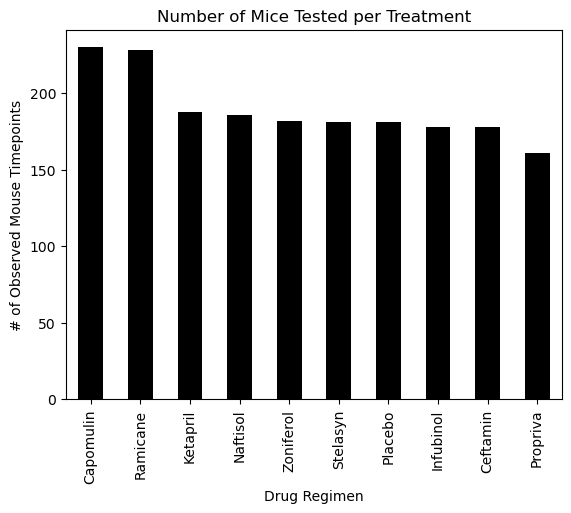

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

mice_count.plot.bar(color='0')  
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

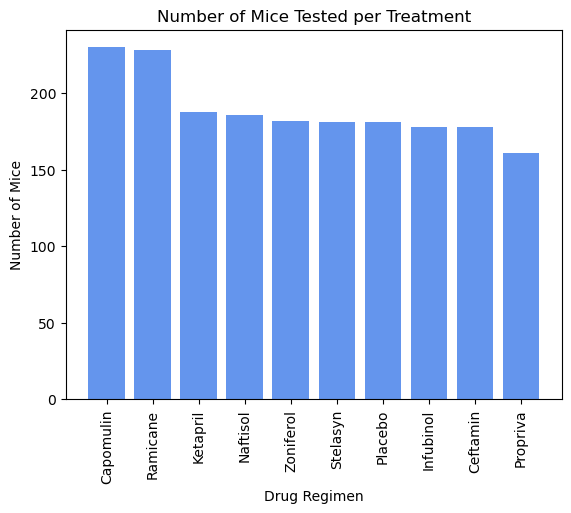

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Module 5 - Day 1 - Activity 7
# https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='cornflowerblue', align='center')

plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

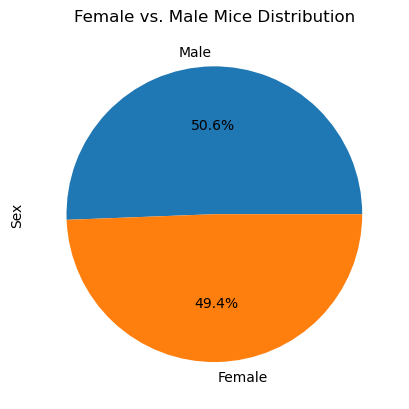

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

gender_data = clean_df["Sex"].value_counts()

plt.title("Female vs. Male Mice Distribution")
gender_data.plot.pie(autopct= "%1.1f%%")

plt.show()

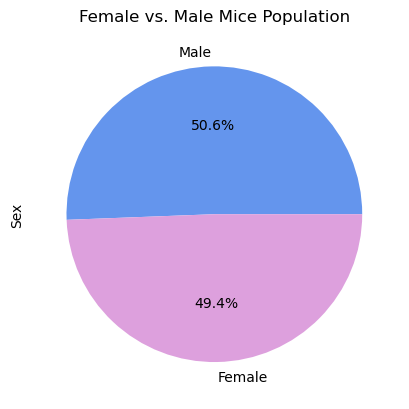

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Module 5 - Day 1 - Activity 9

labels = ["Male","Female"]
sizes = clean_df["Sex"].value_counts()
colors = ["cornflowerblue","plum"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Female vs. Male Mice Population")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Module 4 - Day 2 - Activity 1
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_volume = pd.DataFrame(capomulin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Module 4 - Day 3 - Activity 1
capomulin_merge = pd.merge(capomulin_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [15]:
# Module 5 - Day 3 - Activity 2
cap_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles = cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin's potential outliers could be values below {lower_bound} and above {upper_bound}.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.1251644 
Capomulin's potential outliers could be values below 20.70456164999999 and above 51.83201549.


In [16]:
#ramicame
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_volume = pd.DataFrame(ramicane_last)

ramicane_merge = pd.merge(ramicane_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [17]:
# Module 5 - Day 3 - Activity 2
ram_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles = ram_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane's potential outliers could be values below {lower_bound} and above {upper_bound}.")

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Ramicane's potential outliers could be values below 17.912664470000003 and above 54.30681135.


In [18]:
#infubinol
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_volume = pd.DataFrame(infubinol_last)

infubinol_merge = pd.merge(infubinol_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [19]:
# Module 5 - Day 3 - Activity 2
inf_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles = inf_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol's potential outliers could be values below {lower_bound} and above {upper_bound}.")

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Infubinol's potential outliers could be values below 36.83290494999999 and above 82.74144559000001.


In [20]:
#ceftamin
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_volume = pd.DataFrame(ceftamin_last)

ceftamin_merge = pd.merge(ceftamin_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [21]:
# Module 5 - Day 3 - Activity 2
cef_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = cef_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin's potential outliers could be values below {lower_bound} and above {upper_bound}.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Ceftamin's potential outliers could be values below 25.355449580000002 and above 87.66645829999999.


(10.0, 80.0)

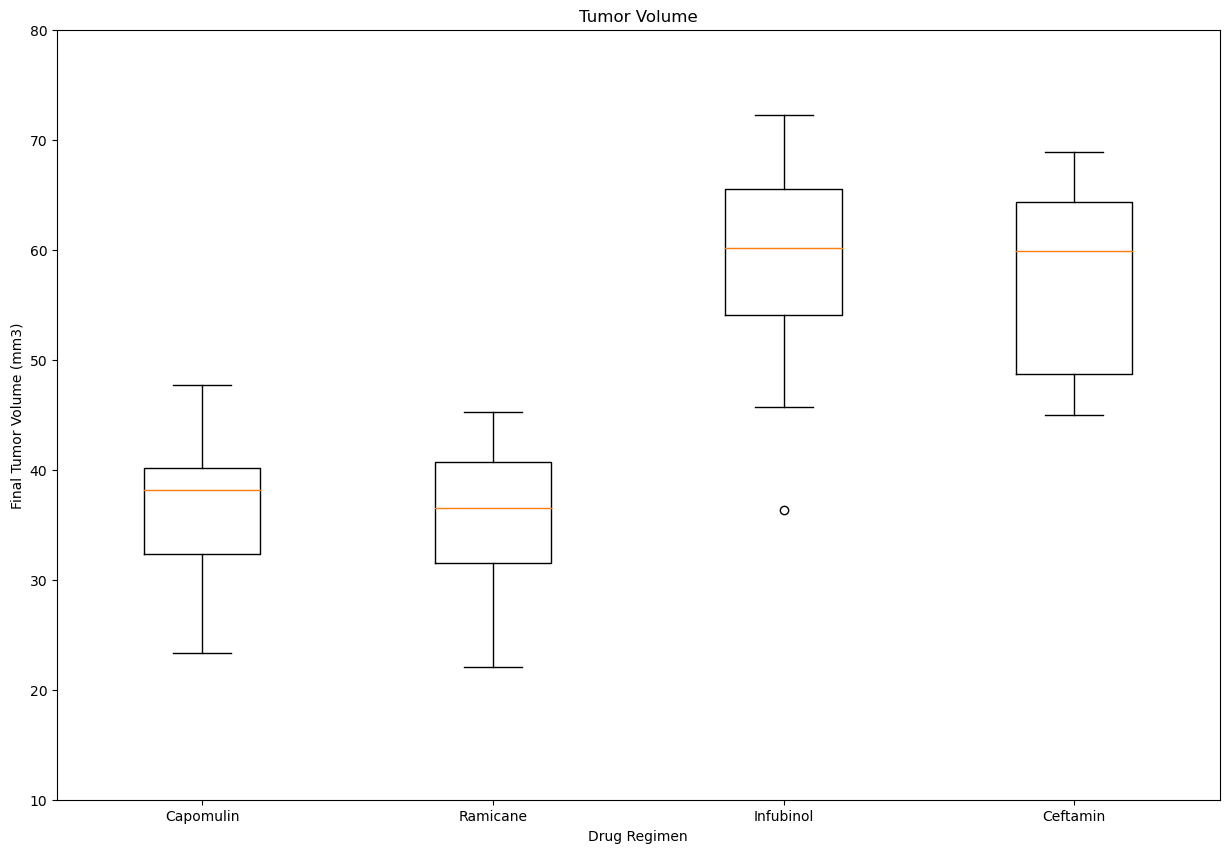

In [22]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Module 5 - Day 3 - Activity 2

plot = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]
Regimen = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title("Tumor Volume")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(plot, labels=Regimen, widths = 0.4,vert=True)
plt.ylim(10, 80)


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

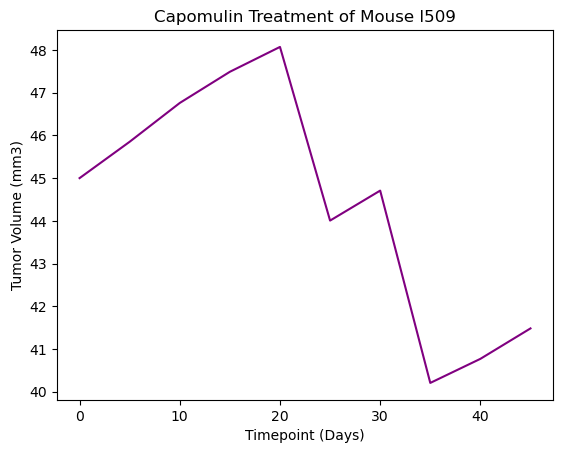

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Module 5 - Day 1 - Activity 6

line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
line_df
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis,color="purple")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin Treatment of Mouse l509")

C:\Users\lyvia\AppData\Local\Temp\ipykernel_7280\1754378645.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_capomulin = capomulin_df.groupby(["Mouse ID"]).mean()


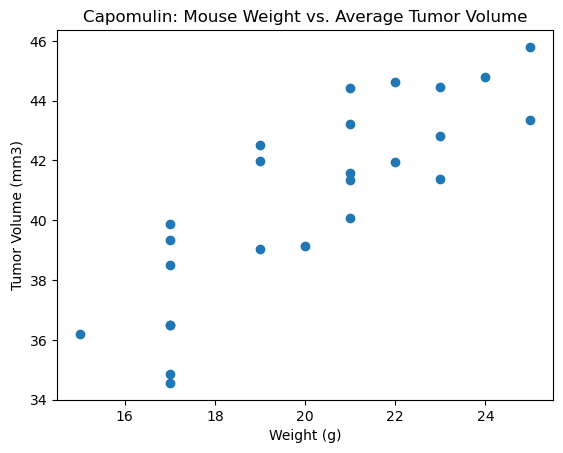

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Module 5 - Day 3 - Activity 3

average_capomulin = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(average_capomulin["Weight (g)"],average_capomulin["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin: Mouse Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


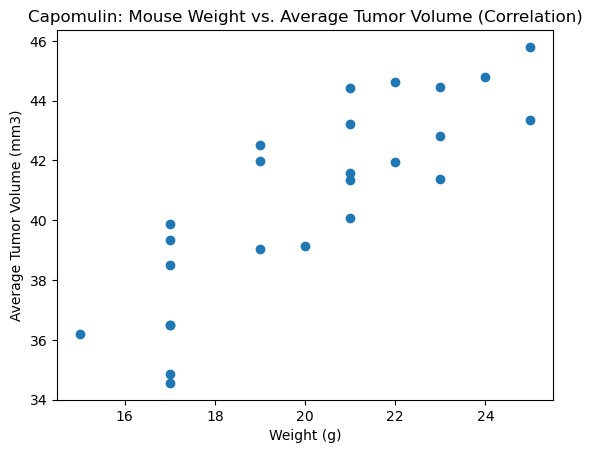

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Module 5 - Day 3 - Activity 6

correlation = st.pearsonr(average_capomulin["Weight (g)"],average_capomulin["Tumor Volume (mm3)"])
plt.scatter(average_capomulin["Weight (g)"],average_capomulin["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: Mouse Weight vs. Average Tumor Volume (Correlation)")

print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

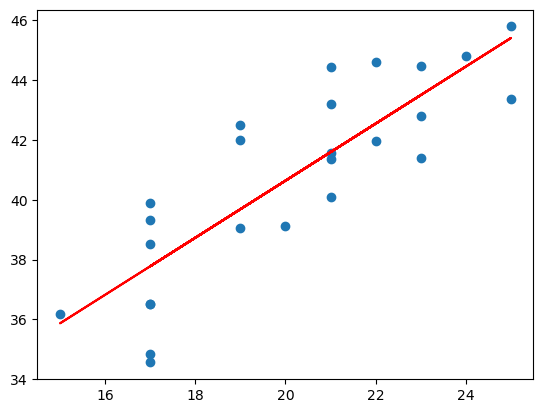

In [26]:
#regression 
#Module 5 - Day 3 - Activity 8

x_values = average_capomulin["Weight (g)"]
y_values = average_capomulin["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")